# House Case Study

Problem Statement:

Consider a real estate company that has a dataset containing the prices of properties in the Delhi region. It wishes to use the data to optimise the sale prices of the properties based on important factors such as area, bedrooms, parking, etc.

Essentially, the company wants —


- To identify the variables affecting house prices, e.g. area, number of rooms, bathrooms, etc.

- To create a linear model that quantitatively relates house prices with variables such as number of rooms, area, number of bathrooms, etc.

- To know the accuracy of the model, i.e. how well these variables can predict house prices.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
df = pd.read_csv('Housing.csv')

In [4]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
price               545 non-null int64
area                545 non-null int64
bedrooms            545 non-null int64
bathrooms           545 non-null int64
stories             545 non-null int64
mainroad            545 non-null object
guestroom           545 non-null object
basement            545 non-null object
hotwaterheating     545 non-null object
airconditioning     545 non-null object
parking             545 non-null int64
prefarea            545 non-null object
furnishingstatus    545 non-null object
dtypes: int64(6), object(7)
memory usage: 55.4+ KB


In [6]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


# Data Preparation

In [7]:
df['mainroad'] = df['mainroad'].map({'yes':1, 'no':0})
df['guestroom'] = df['guestroom'].map({'yes':1, 'no':0})
df['basement'] = df['basement'].map({'yes':1, 'no':0})
df['hotwaterheating'] = df['hotwaterheating'].map({'yes':1, 'no':0})
df['airconditioning'] = df['airconditioning'].map({'yes':1, 'no':0})
df['prefarea'] = df['prefarea'].map({'yes':1, 'no':0})

In [8]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


Since we have 3 status of Furnishing we make use of dummy values 

In [9]:
df['furnishingstatus'].value_counts()

semi-furnished    227
unfurnished       178
furnished         140
Name: furnishingstatus, dtype: int64

In [10]:
status = pd.get_dummies(df['furnishingstatus'])

In [11]:
status.head()

,furnished,semi-furnished,unfurnished
0,1,0,0
1,1,0,0
2,0,1,0
3,1,0,0
4,1,0,0


Since the sum of each row should be 1, the status of furnishing can be determined by any 2 variables 

In [12]:
status = pd.get_dummies(df['furnishingstatus'], drop_first = True)

In [13]:
df = pd.concat([df,status], axis = 1)

In [14]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished,0,0


In [15]:
df.drop(['furnishingstatus'], axis = 1, inplace = True)

In [16]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


In [17]:
# Beedroom area 
df['area_bd'] = df['area']/df['bedrooms']
# Beedroom Bathroom Ratio
df['bb_ratio'] = df['bedrooms']/df['bathrooms']

In [18]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished,area_bd,bb_ratio
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0,1855.0,2.0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0,2240.0,1.0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0,3320.0,1.5
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0,1875.0,2.0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0,1855.0,4.0


In [19]:
# Putting feature variable to X
X = df[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'semi-furnished', 'unfurnished',
       'area_bd', 'bb_ratio']]

# Putting response variable to y
y = df['price']

In [20]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7 ,test_size = 0.3, random_state=100)

C:\Users\Maltesh\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [21]:
import statsmodels.api as sm          
X_train = sm.add_constant(X_train)    # Adding a constant column to our dataframe
lml = sm.OLS(y_train,X_train).fit()

Here we can see that coef values are too big which affects the other values 

In [22]:
print(lml.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     53.10
Date:                Thu, 04 Apr 2019   Prob (F-statistic):           4.71e-82
Time:                        14:19:47   Log-Likelihood:                -5811.5
No. Observations:                 381   AIC:                         1.166e+04
Df Residuals:                     365   BIC:                         1.172e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1.083e+06   8.55e+05     

### Rescaling the Features 
It is extremely important to rescale the variables so that they have a comparable scale. 
There are twocoon ways of rescaling 
1. Normalisation (min-max scaling) and 
2. standardisation (mean-o, sigma-1) 
Let's try normalisation

In [23]:
# UDEMY MLR Case study part 3
def normailze(x):
    return ((x-np.min(x))/max(x)-min(x))

df = df.apply(normailze)

In [24]:
# Putting feature variable to X
X = df[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'semi-furnished', 'unfurnished',
       'area_bd', 'bb_ratio']]

# Putting response variable to y
y = df['price']

In [25]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7 ,test_size = 0.3, random_state=100)

In [26]:
import statsmodels.api as sm          
X_train = sm.add_constant(X_train)    # Adding a constant column to our dataframe
lml = sm.OLS(y_train,X_train).fit()

In [27]:
print(lml.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     53.10
Date:                Thu, 04 Apr 2019   Prob (F-statistic):           4.71e-82
Time:                        14:19:48   Log-Likelihood:                 438.12
No. Observations:                 381   AIC:                            -844.2
Df Residuals:                     365   BIC:                            -781.2
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -1.749e+06    150.431  -1.

# Using RFE

In [28]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [29]:
lm = LinearRegression()
rfe = RFE(lm, 9)
rfe = rfe.fit(X_train, y_train)

In [30]:
rfe.support_

array([False,  True,  True,  True,  True,  True, False, False,  True,
        True, False,  True, False, False,  True, False])

In [31]:
rfe.ranking_

array([8, 1, 1, 1, 1, 1, 3, 6, 1, 1, 2, 1, 7, 4, 1, 5])

In [32]:
col = X_train.columns[rfe.support_]

In [33]:
x_train_rfe = X_train[col]

In [34]:
import statsmodels.api as sm
x_train_rfe = sm.add_constant(x_train_rfe)

In [35]:
lm = sm.OLS(y_train, x_train_rfe).fit()

In [36]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.660
Model:                            OLS   Adj. R-squared:                  0.652
Method:                 Least Squares   F-statistic:                     80.01
Date:                Thu, 04 Apr 2019   Prob (F-statistic):           2.28e-81
Time:                        14:19:51   Log-Likelihood:                 423.09
No. Observations:                 381   AIC:                            -826.2
Df Residuals:                     371   BIC:                            -786.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -1.749e+06    146.644  -1.

In [37]:
def vif_cal(input_data, dependent_col):
    vif_df = pd.DataFrame( columns = ['Var', 'Vif'])
    x_vars=input_data.drop([dependent_col], axis=1)
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.OLS(y,x).fit().rsquared  
        vif=round(1/(1-rsq),2)
        vif_df.loc[i] = [xvar_names[i], vif]
    return vif_df.sort_values(by = 'Vif', axis=0, ascending=False, inplace=False)

In [38]:
vif_cal(input_data=df.drop(['area','bedrooms','stories','basement','semi-furnished','area_bd'], axis=1), dependent_col="price")

,Var,Vif
0,bathrooms,15.50
8,bb_ratio,15.40
1,mainroad,7.76
5,parking,1.80
4,airconditioning,1.58
7,unfurnished,1.58
6,prefarea,1.41
2,guestroom,1.28
3,hotwaterheating,1.08


In [39]:
x_test_rfe = X_test[col]
x_test_rfe = sm.add_constant(x_test_rfe)
y_pred = lm.predict(x_test_rfe)

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
len(x_test_rfe)

164

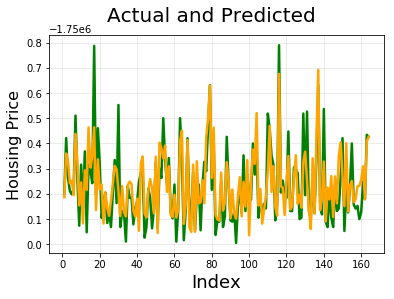

In [42]:
# Actual and Predicted
import matplotlib.pyplot as plt
c = [i for i in range(1,165,1)] 
fig = plt.figure() 
plt.plot(c,y_test, color="green", linewidth=2.5, linestyle="-") 
plt.plot(c,y_pred, color="orange",  linewidth=2.5, linestyle="-") 
fig.suptitle('Actual and Predicted', fontsize=20)               
plt.xlabel('Index', fontsize=18)                               
plt.ylabel('Housing Price', fontsize=16)    
plt.grid(alpha = 0.3)

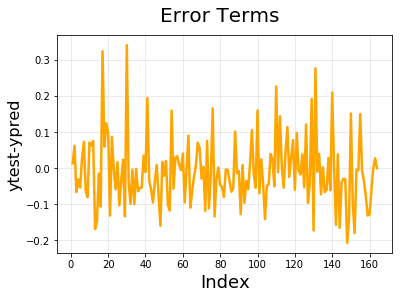

In [43]:
# Error terms
c = [i for i in range(1,165,1)]
fig = plt.figure()
plt.plot(c,y_test-y_pred, color="orange", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)               
plt.xlabel('Index', fontsize=18)                      
plt.ylabel('ytest-ypred', fontsize=16)                
plt.grid(alpha = 0.3)

Text(0,0.5,'y_pred')

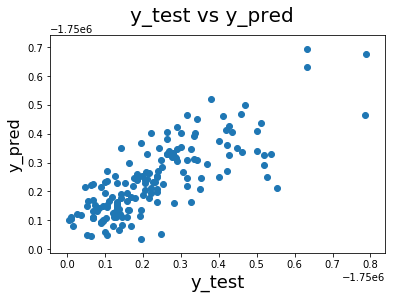

In [44]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)             
plt.xlabel('y_test', fontsize=18)                          
plt.ylabel('y_pred', fontsize=16)                          

C:\Users\Maltesh\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0,0.5,'Index')

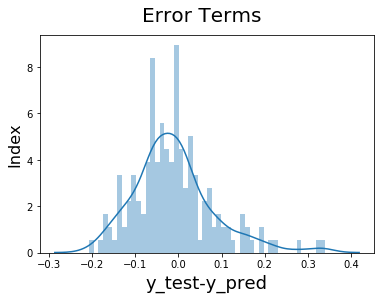

In [45]:
# Plotting the error terms to understand the distribution.
fig = plt.figure()
sns.distplot((y_test-y_pred),bins=50)
fig.suptitle('Error Terms', fontsize=20)                  
plt.xlabel('y_test-y_pred', fontsize=18)                  
plt.ylabel('Index', fontsize=16)                          

In [47]:
# Now let's check the Root Mean Square Error of our model.
import numpy as np
from sklearn.metrics import r2_score
print('RMSE :', r2_score(y_test, y_pred))

RMSE : 0.6032227102046093
